# Twitter Sentiment Analysis

In [1]:
#This is a sentiment analysis program that parses tweets fetched from Twitter using Python

In [113]:
#Importing libraries

import tweepy
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [114]:
log=pd.read_csv("login1.csv")

In [115]:
#Twitter API credentials

apiKey = log['key'][0]
apiKeySecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]
bearerToken = log['key'][4]

In [116]:
#Create the API object while passing in the authentication information

client = tweepy.Client(bearer_token=bearerToken)

In [161]:
#The topic chosen for the sentiment analysis is the Indian economy

query = "indian economy -is:retweet"
response = client.search_recent_tweets(query=query, max_results=100)

#Show the top 20 tweets

i=1;
for tweet in response.data:
    print(str(i)+')'+tweet.text)
    if(i==20):
        break
    i=i+1

1)$qqq https://t.co/NGRIF2JOSl
2)There's only 1 thing hou can name yourself if you think Indian economy will rebound with #CrudeOil falling 11% - "Fool" !
You may also be called as infected with exposure love.
We can afford crudeoil even if it is at 200$ provided we can afford.
We can afford only if we hav jobs!
3)#south #asia #india exports https://t.co/1zq1x1lUY3 https://t.co/rgohjTTG1w
4)Indian rupee at Rs 79.36 against USD, gold touches Rs 54K https://t.co/MysQezodVE #IndianRupee #Dollar #ExchangeRate #NewLow @netindian
5)Indian rupee at Rs 79.36 against USD, gold touches Rs 54K
 https://t.co/oswjD2grDy
6)@quamrul72 @ashoswai when did china occupy ?
1962 ?
who was d president ?
u want a war with china ?
will u fight ?
is it good for indian economy ?
7)While the #Indian #Economy shall remain strong and performing amidst such chaos #Global challenges would definitely impact few sectors on the #Economy side and various #FinancialInstruments on the #Markets side.... (3/n)
8)He proved h

In [162]:
#Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.text for tweet in response.data], columns=['Tweets'])

#Show the first 5 rows
df.head()

,Tweets
0,$qqq https://t.co/NGRIF2JOSl
1,There's only 1 thing hou can name yourself if ...
2,#south #asia #india exports https://t.co/1zq1x...
3,"Indian rupee at Rs 79.36 against USD, gold tou..."
4,"Indian rupee at Rs 79.36 against USD, gold tou..."


### Hashtag Analysis

In [163]:
#Function to extract hashtags from the tweets
def find_hashtags(tweet):
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

df['Hashtags'] = df['Tweets'].apply(find_hashtags)

#Show the updated dateframe with 'Hashtags' column
df

,Tweets,Hashtags
0,$qqq https://t.co/NGRIF2JOSl,[]
1,There's only 1 thing hou can name yourself if ...,[#CrudeOil]
2,#south #asia #india exports https://t.co/1zq1x...,"[#south, #asia, #india]"
3,"Indian rupee at Rs 79.36 against USD, gold tou...","[#IndianRupee, #Dollar, #ExchangeRate, #NewLow]"
4,"Indian rupee at Rs 79.36 against USD, gold tou...",[]
...,...,...
95,Circular Economy is one of the themes of the N...,[]
96,Reforms that are Helping Indian Economy Perfor...,[]
97,The country's unemployment rate has shot up at...,[]
98,📢 Breaking News: Unemployment rate in India ri...,[]


In [164]:
#Create a seperate dataframe for hashtags

hashtag_list = df['Hashtags'].to_list()
flat_hashtags_df = pd.DataFrame([item for sublist in hashtag_list for item in sublist])
flat_hashtags_df.columns = ['Hashtags']

#Display the top 5 entries of the dataframe

flat_hashtags_df.head()

,Hashtags
0,#CrudeOil
1,#south
2,#asia
3,#india
4,#IndianRupee


In [165]:
print("Total hashtags: ", len(flat_hashtags_df['Hashtags']))
print("Repeated hashtags: ", len(flat_hashtags_df['Hashtags'].unique()))

Total hashtags:  63
Repeated hashtags:  53


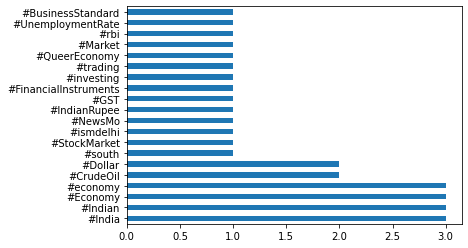

In [166]:
#Plot the occurence of each hashtag

flat_hashtags_df['Hashtags'].value_counts()[:20].plot(kind='barh')

### Polarity analysis

In [167]:
#Clean the text

def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #Remove @mentions
    text = re.sub(r'#+', '', text) #Removing the # symbol
    text = re.sub(r'RT[\s]', '', text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','',text) #Removing hyperlinks
    text = re.sub(r'\n', '', text) #Remving the new line character
    return text

#Using the function cleanText to clean the tweet

df['Tweets']=df['Tweets'].apply(cleanText)

#Show the cleaned text
df = df.drop('Hashtags',axis=1)
df

,Tweets
0,$qqq
1,There's only 1 thing hou can name yourself if ...
2,south asia india exports
3,"Indian rupee at Rs 79.36 against USD, gold tou..."
4,"Indian rupee at Rs 79.36 against USD, gold tou..."
...,...
95,Circular Economy is one of the themes of the N...
96,Reforms that are Helping Indian Economy Perfor...
97,The country's unemployment rate has shot up at...
98,📢 Breaking News: Unemployment rate in India ri...


In [168]:
#Function to calculate the sentiment of the tweet

for index, row in df['Tweets'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    if score['neg'] > score['pos']:
        df.loc[index, "Sentiment"] = "Negative"
    elif score['pos'] > score['neg']:
        df.loc[index, "Sentiment"] = "Positive"
    else:
        df.loc[index, "Sentiment"] = "Neutral"
        
    df.loc[index, 'neg'] = score['neg']
    df.loc[index, 'neu'] = score['neu']
    df.loc[index, 'pos'] = score['pos']
    df.loc[index, 'compound'] = score['compound']
    
df.head(10)

,Tweets,Sentiment,neg,neu,pos,compound
0,$qqq,Neutral,0.000,1.000,0.000,0.0000
1,There's only 1 thing hou can name yourself if ...,Negative,0.103,0.897,0.000,-0.6580
2,south asia india exports,Neutral,0.000,1.000,0.000,0.0000
3,"Indian rupee at Rs 79.36 against USD, gold tou...",Neutral,0.000,1.000,0.000,0.0000
4,"Indian rupee at Rs 79.36 against USD, gold tou...",Neutral,0.000,1.000,0.000,0.0000
5,when did china occupy ?1962 ?who was d presi...,Negative,0.260,0.593,0.147,-0.6440
6,While the Indian Economy shall remain strong a...,Positive,0.097,0.711,0.192,0.3818
7,He proved himself as 'Chanakya' for his abilit...,Positive,0.034,0.913,0.053,0.2023
8,_News निजिकरण_भगाओ_देश_बचाओ Save PSU Banks Sa...,Positive,0.000,0.484,0.516,0.7506
9,"_sayys Well said, right now china is facing ...",Positive,0.075,0.786,0.139,0.5784


(-0.5, 499.5, 299.5, -0.5)

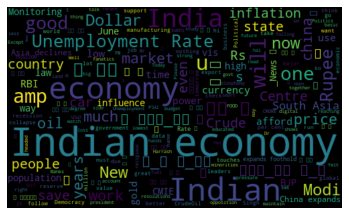

In [169]:
#Plot the word cloud

allWords = ' '.join([twts for twts in df['Tweets']])

wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')

In [170]:
#Print the positive tweets
j=1;
for i in range(0,df.shape[0]):
    if(df['Sentiment'][i]=='Positive'):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1)   Uff man what’s the price of fuel in Sri Lanka? Oh shit you don’t have fuel to use.. isn’t it? And btw how much debt your country have in last 3 years 😂😂😂 more than Indian economy I guess.

2)  This number is a joke like the $30T Indian economy. 

3)  Indian Pacers in 4th inns of the 3 OS Tests dis yearRuns: 663Wkts: 7Avg: 94.71ER: 3.99Bhai bumrah 4+ economy se run kha rha thaBaanki ko kya hi boleinKabhi elgar..kabhi peterson 2.0 kabhi bairstow..Root toh tha hiHadd haiT20 wc main PakistanSaal hi panauti haiUr rant 

4)     IS SUCH TRILLION DOLLAR ECONOMY REQUIRED FOR  INDIA /INDIAN STATES ?, EVEN AFTER 75 YEARS OF INDEPENDENCE , 80 CRORE POPULATION ARE ON FREE FOOD RATION AND THEY CAN NOT AFFORD TO BUY HIGH PRICED LPG CYLINDER UNDER UJJALA YOJJANA.

5) In Focus | Experts M.K. Agarwal and Deepshikha Sikarwar discuss on 'Indian Economy Looks Up'Watch:  

6)  Do not bring too much Celebrities to Indian Politics, They have only power to win in election n nothing to do for Economy nor c

In [171]:
#Print the negative tweets
j=1;

for i in range(0,df.shape[0]):
    if(df['Sentiment'][i]=='Negative'):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) Modi govt. has been amazing at distracting people from major issues like unemployment and state of Indian economy. We only talk about projections and how big the economy would be 30 years from now, that's all bullshit!(2/n)economy India   

2)   @_DigitalIndia Today great resolutions for jpnadda ji at pmmodi ji great leadership for support more increase digital economy resolutions to empowerment all sarvices to fastest technologies to one finger for 135crore Indian people to digital connectivity to economy more effort to future generat

3) Crude oil prices failing, good sign for indian economy.

4) Hotel owners &amp; indian economy  

5) Pakistanis should watch such informed shows about their economy ofcourse by Indian..not their inhouse rabble-rousers. 

6)  You should have ask follow up question to this smart gentleman why Indian currency is worst in Asia.. it’s not black or white🤦🏽 

7) _tanu  What about this? 🤣😂

8)  _indi  Rupee decline is not a negative for Indian economy. Sea

In [172]:
#Get the percentage of positive tweets

ptweets = df[df["Sentiment"] == "Positive"]
ptweets = ptweets['Tweets']
round ((ptweets.shape[0]/df.shape[0])*100, 1)

39.0

In [173]:
#Get the percentage of negative tweets

ntweets = df[df["Sentiment"] == "Negative"]
ntweets = ntweets['Tweets']
round ((ntweets.shape[0]/df.shape[0])*100, 1)

43.0

In [174]:
#Get the percentage of neutral tweets
nltweets = df[df["Sentiment"] == "Neutral"]
nltweets = nltweets['Tweets']

round ((nltweets.shape[0]/df.shape[0])*100, 1)

18.0

<BarContainer object of 3 artists>

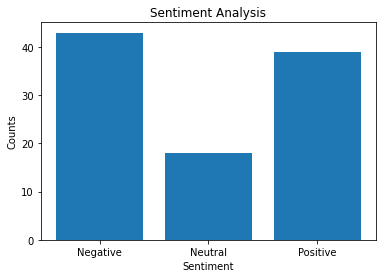

In [175]:
#Plot and visualize the value counts
labels = df.groupby('Sentiment').count().index.values
values = df.groupby('Sentiment').size().values
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.bar(labels, values)